### Load The Data : Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data : Importing Raw data

In [2]:
file = "INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls"
original_data= pd.read_excel(file)
original_data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


### Source Code
### Exploratory Data Analysis

In [3]:
# Check Values of Target 
original_data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

##### Problem:
In This Dataset
- No of Target = 1
- Target Cordinality >2 
- Type Of Target is Multi Class
##### * This is Multi Class Classification Problem

In [4]:
# All columns in dataset
original_data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [5]:
# Shape of data
original_data.shape

(1200, 28)

- data has 28 Features and 1200 employees

In [6]:
# Data types of the features
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
# Check NaN Values
np.nan == True

False

In [8]:
# Calculating Null Values
original_data.isnull().sum().sum()

0

In [9]:
# Check duplicate values
original_data.duplicated == True

False

In [10]:
# calculating duplicate values
original_data.duplicated().sum()

0

- There is no NaN or Null or Duplicate values present in the Data Set

##### Distribution of the dataset
- In general, one of the first few steps in exploring the data would be to have a rough idea of how the features are distributed with one another. To do so, we shall invoke the familiar kdeplot function from the Seaborn plotting library. The distribution has been done by both numerical and categorical features. it will show the overall idea about the density and majority of data present in a different level.

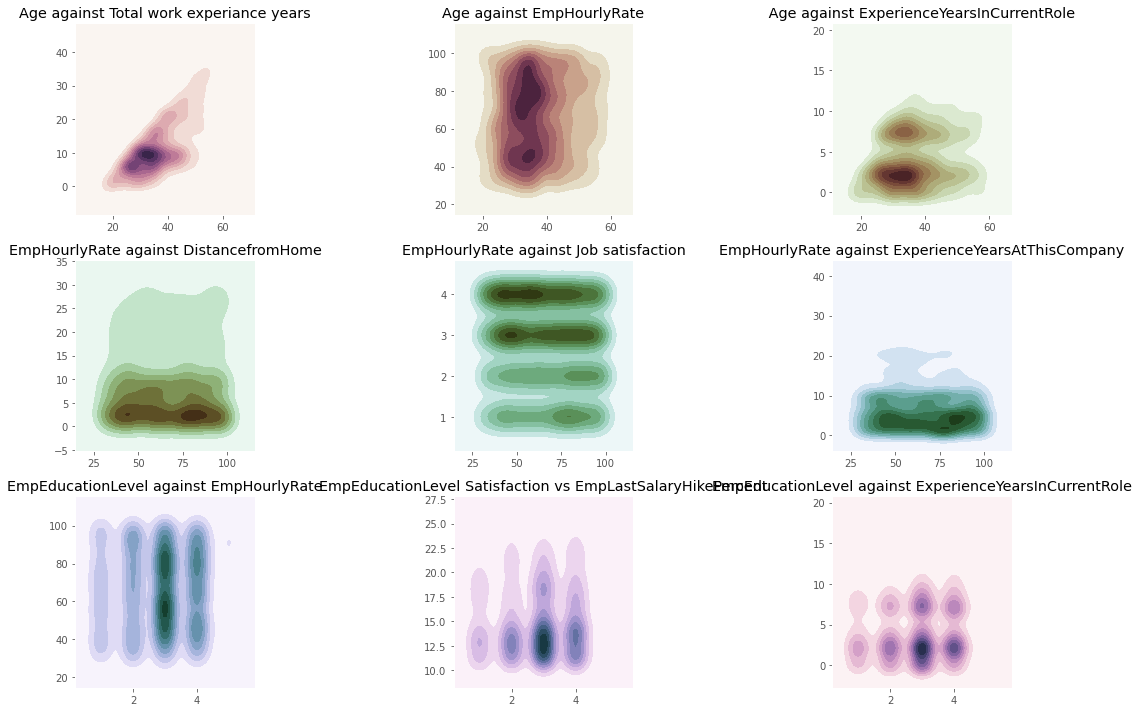

In [11]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(15, 10), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = original_data['Age'].values
y = original_data['TotalWorkExperienceInYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total work experiance years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = original_data['Age'].values
y = original_data['EmpHourlyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against EmpHourlyRate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = original_data['Age'].values
y = original_data['ExperienceYearsInCurrentRole'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = ' Age against ExperienceYearsInCurrentRole ')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpHourlyRate'].values
y = original_data['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'EmpHourlyRate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpHourlyRate'].values
y = original_data['EmpJobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'EmpHourlyRate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpHourlyRate'].values
y = original_data['ExperienceYearsAtThisCompany'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'EmpHourlyRate against ExperienceYearsAtThisCompany')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpEducationLevel'].values
y = original_data['EmpHourlyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'EmpEducationLevel against EmpHourlyRate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpEducationLevel'].values
y = original_data['EmpLastSalaryHikePercent'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'EmpEducationLevel Satisfaction vs EmpLastSalaryHikePercent')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = original_data['EmpEducationLevel'].values
y = original_data['ExperienceYearsInCurrentRole'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'EmpEducationLevel against ExperienceYearsInCurrentRole')

f.tight_layout()

In [12]:
# Distribution of Numerical features
original_data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


##### Distribution of Numerical Features
- This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.the distribution can be derived or visualized using the density map between the numerical or categorical features present in the data.

- The age distribution is starting from 18 to 60 where the most of the employees are lying between 30 to 40 age count.
- The distance from home to office is distributing from 0 unit to 30 unit which can be kilometre or mile. The most of the employees are coming from the range of 0 to 5 units.
- Employees are worked in the multiple companies up to 8 companies where most of the employees worked up to 2 companies before getting to work here.
- The hourly rate range is 65 to 95 for majority employees work in this company.
- In General, Most of Employees work up to 5 years in this company.
- Most of the employees get 11% to 15% of salary hike in this company.

In [13]:
# Distribution of Categorical features
original_data.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001327,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


##### Distribution of Categorical Features
- The Gender variance is divided by 60% of Male employees and 40% of Female employees in the company.
- The number of the educational backgrounds present in the employees is six unique backgrounds.
- nineteen unique employee job roles are present in this company.
- The most of the employees are having the education level of 3
- The Job satisfaction level in this company is high level for the majority of employees.
- The 85% of employees are not having attrition in their work
- only 11% of employees in the company were achieved level 4 - performance rating
- The overall percentage of employees doing overtime is 30%

##### Identifing Variables
- PerformanceRating is Dependent Varible and rest all are independent variable

### 1.Department wise performances
- In department wise performance, we have to analyze the data by each department present in the category. The data frame has to be separated or sliced according to department wise.
- In Employee department feature there are six departments available.
  - Sales
  - Human Resoruces
  - Development
  - Data Science
  - Reserch & Devlopment
  - Finace

In [14]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
original_data.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

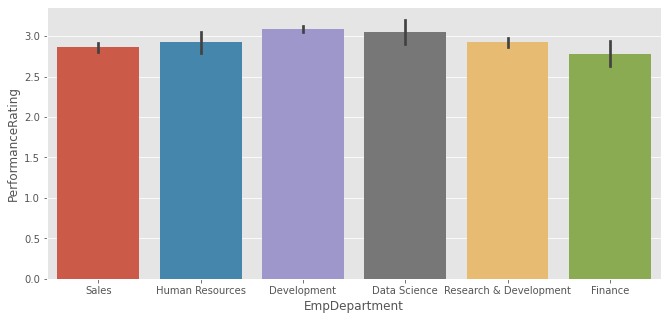

In [15]:
plt.figure(figsize=(11,5))
sns.barplot(original_data['EmpDepartment'],original_data['PerformanceRating'])

In [16]:
# Analyze each department separately
original_data.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

##### Sales Department

In [17]:
sales = original_data[original_data.EmpDepartment == 'Sales'] # Slicing the all coloums of Sales Row 
sales.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
6,E1001016,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,...,4,4,2,3,2,2,2,2,No,3


- Performance Rating with respect to number of employees

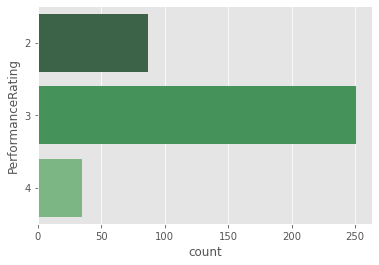

In [18]:
sns.countplot(y="PerformanceRating", data=sales, palette="Greens_d");

- Performance Rating with respect to Age Group

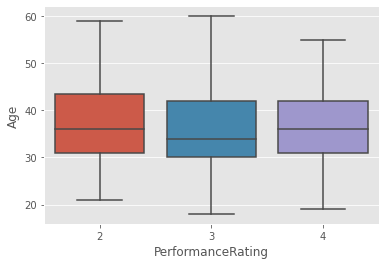

In [19]:
sns.boxplot(sales['PerformanceRating'], sales['Age'])

- Performance based on Gender

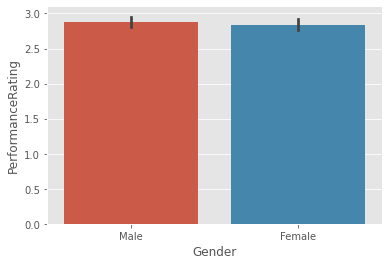

In [20]:
sns.barplot(sales['Gender'], sales['PerformanceRating'])

- Performance According to the Experience Level

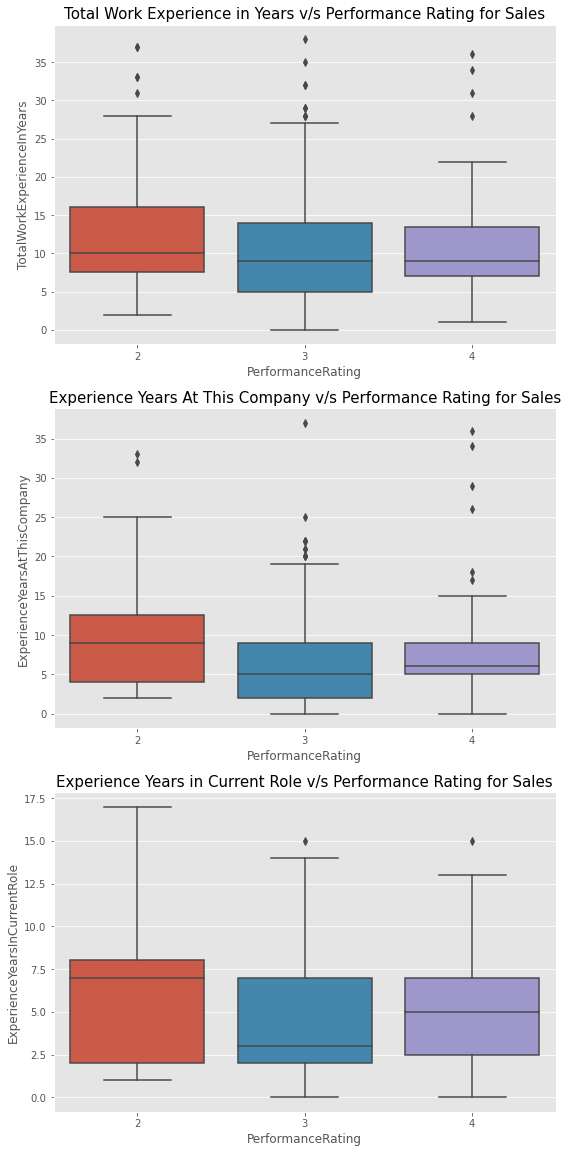

In [21]:
plt.figure(figsize=(9,20))
plt.subplot(311)
sns.boxplot(sales['PerformanceRating'], sales['TotalWorkExperienceInYears'])
plt.title("Total Work Experience in Years v/s Performance Rating for Sales", fontsize = 15)

plt.subplot(312)
sns.boxplot(sales['PerformanceRating'], sales['ExperienceYearsAtThisCompany'])
plt.title("Experience Years At This Company v/s Performance Rating for Sales", fontsize = 15)

plt.subplot(313)
sns.boxplot(sales['PerformanceRating'], sales['ExperienceYearsInCurrentRole'])
plt.title("Experience Years in Current Role v/s Performance Rating for Sales", fontsize = 15)

plt.show()

##### Human Resoruces Department

In [22]:
HR = original_data[original_data.EmpDepartment == 'Human Resources'] # Slicing the all coloums of Sales Row 
HR.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
16,E1001038,39,Female,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,3,3,...,3,12,3,1,8,3,3,6,No,3
58,E1001107,36,Male,Human Resources,Married,Human Resources,Human Resources,Travel_Rarely,13,3,...,2,8,2,3,5,2,0,4,No,3
81,E1001147,28,Male,Medical,Divorced,Human Resources,Human Resources,Travel_Rarely,8,2,...,4,6,6,3,5,1,0,4,No,3
85,E1001156,36,Male,Life Sciences,Married,Human Resources,Human Resources,Travel_Rarely,8,3,...,3,6,3,3,5,4,0,3,No,3


- Performance Rating with respect to number of employees

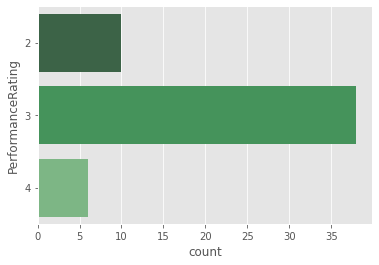

In [23]:
sns.countplot(y="PerformanceRating", data=HR, palette="Greens_d");

- Performance Rating with respect to Age Group

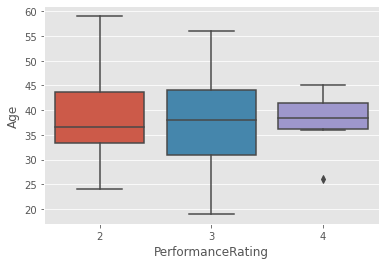

In [24]:
sns.boxplot(HR['PerformanceRating'], HR['Age'])

- Performance based on Gender

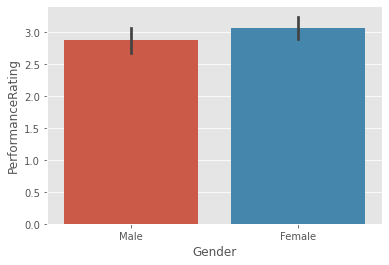

In [25]:
sns.barplot(HR['Gender'], HR['PerformanceRating'])

- Performance According to the Experience Level

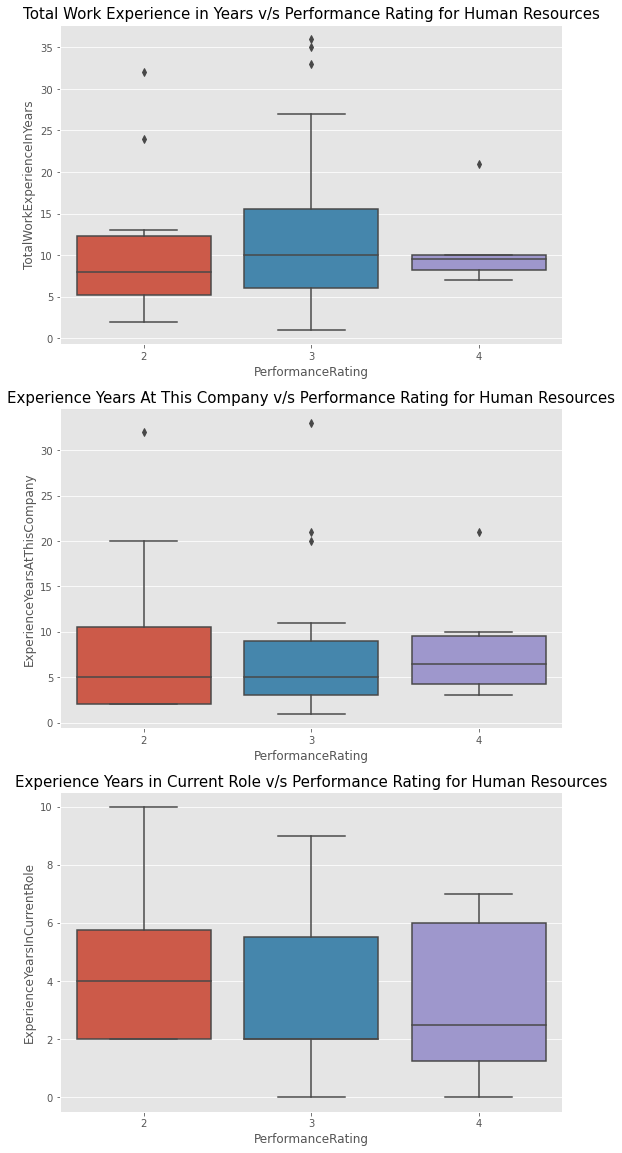

In [26]:
plt.figure(figsize=(9,20))
plt.subplot(311)
sns.boxplot(HR['PerformanceRating'], HR['TotalWorkExperienceInYears'])
plt.title("Total Work Experience in Years v/s Performance Rating for Human Resources", fontsize = 15)

plt.subplot(312)
sns.boxplot(HR['PerformanceRating'], HR['ExperienceYearsAtThisCompany'])
plt.title("Experience Years At This Company v/s Performance Rating for Human Resources", fontsize = 15)

plt.subplot(313)
sns.boxplot(HR['PerformanceRating'], HR['ExperienceYearsInCurrentRole'])
plt.title("Experience Years in Current Role v/s Performance Rating for Human Resources", fontsize = 15)

plt.show()

##### Development Department

In [27]:
Development = original_data[original_data.EmpDepartment == 'Development'] # Slicing the all coloums of Sales Row 
Development.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,...,3,9,4,2,9,7,1,7,No,4
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,...,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,...,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,...,4,10,4,4,1,0,0,0,No,3
10,E1001022,44,Male,Medical,Single,Development,Developer,Non-Travel,24,3,...,3,9,5,3,5,2,1,4,No,3


- Performance Rating with respect to number of employees

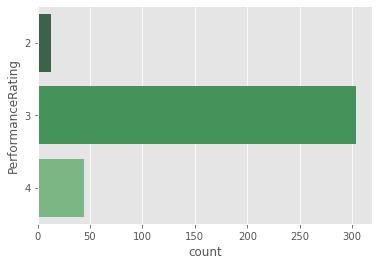

In [28]:
sns.countplot(y="PerformanceRating", data=Development, palette="Greens_d");

- Performance Rating with respect to Age Group

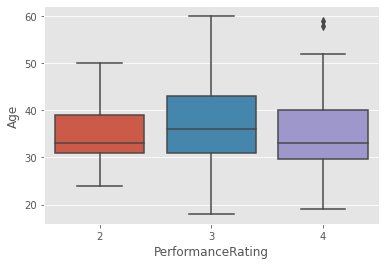

In [29]:
sns.boxplot(Development['PerformanceRating'], Development['Age'])

- Performance based on Gender

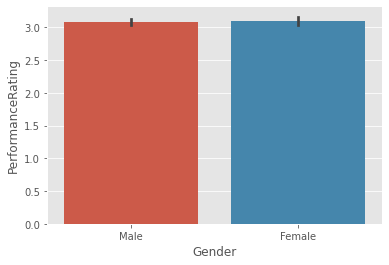

In [30]:
sns.barplot(Development['Gender'], Development['PerformanceRating'])

- Performance According to the Experience Level

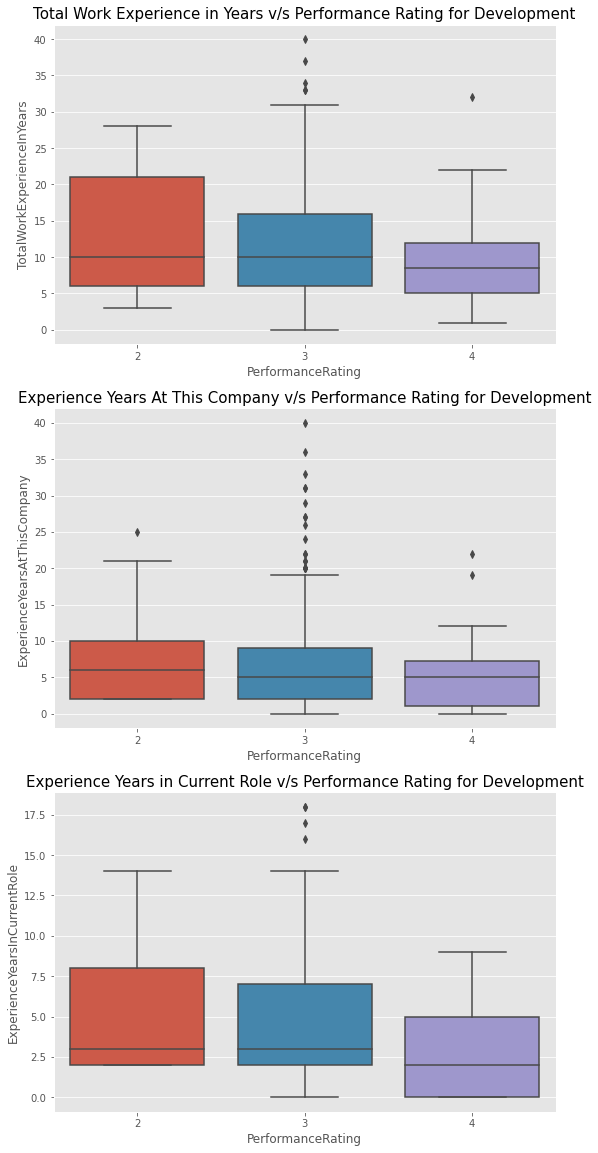

In [31]:
plt.figure(figsize=(9,20))
plt.subplot(311)
sns.boxplot(Development['PerformanceRating'], Development['TotalWorkExperienceInYears'])
plt.title("Total Work Experience in Years v/s Performance Rating for Development", fontsize = 15)

plt.subplot(312)
sns.boxplot(Development['PerformanceRating'], Development['ExperienceYearsAtThisCompany'])
plt.title("Experience Years At This Company v/s Performance Rating for Development", fontsize = 15)

plt.subplot(313)
sns.boxplot(Development['PerformanceRating'], Development['ExperienceYearsInCurrentRole'])
plt.title("Experience Years in Current Role v/s Performance Rating for Development", fontsize = 15)

plt.show()

##### Data Science Department

In [32]:
Data_Science = original_data[original_data.EmpDepartment == 'Data Science'] # Slicing the all coloums of Sales Row 
Data_Science.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
89,E1001165,49,Female,Technical Degree,Married,Data Science,Data Scientist,Travel_Rarely,1,3,...,2,7,2,3,4,2,0,2,No,3
107,E1001201,21,Female,Other,Single,Data Science,Data Scientist,Travel_Rarely,18,1,...,1,1,3,2,1,0,0,0,Yes,3
108,E1001202,36,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,14,1,...,1,17,2,2,16,8,4,11,No,3
120,E1001223,48,Male,Medical,Married,Data Science,Data Scientist,Travel_Rarely,20,4,...,1,13,2,2,0,0,0,0,No,3
942,E100574,51,Male,Life Sciences,Married,Data Science,Data Scientist,Travel_Rarely,8,4,...,4,16,5,1,10,9,4,7,No,3


- Performance Rating with respect to number of employees

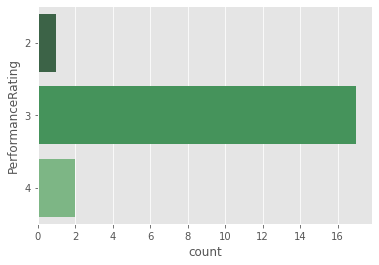

In [33]:
sns.countplot(y="PerformanceRating", data=Data_Science, palette="Greens_d");

- Performance Rating with respect to Age Group

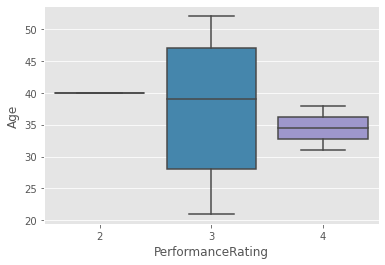

In [34]:
sns.boxplot(Data_Science['PerformanceRating'], Data_Science['Age'])

- Performance based on Gender

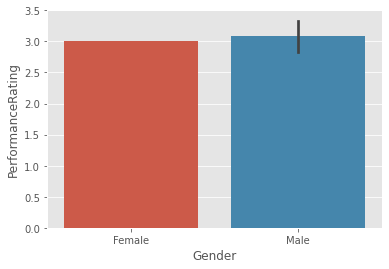

In [35]:
sns.barplot(Data_Science['Gender'], Data_Science['PerformanceRating'])

- Performance According to the Experience Level

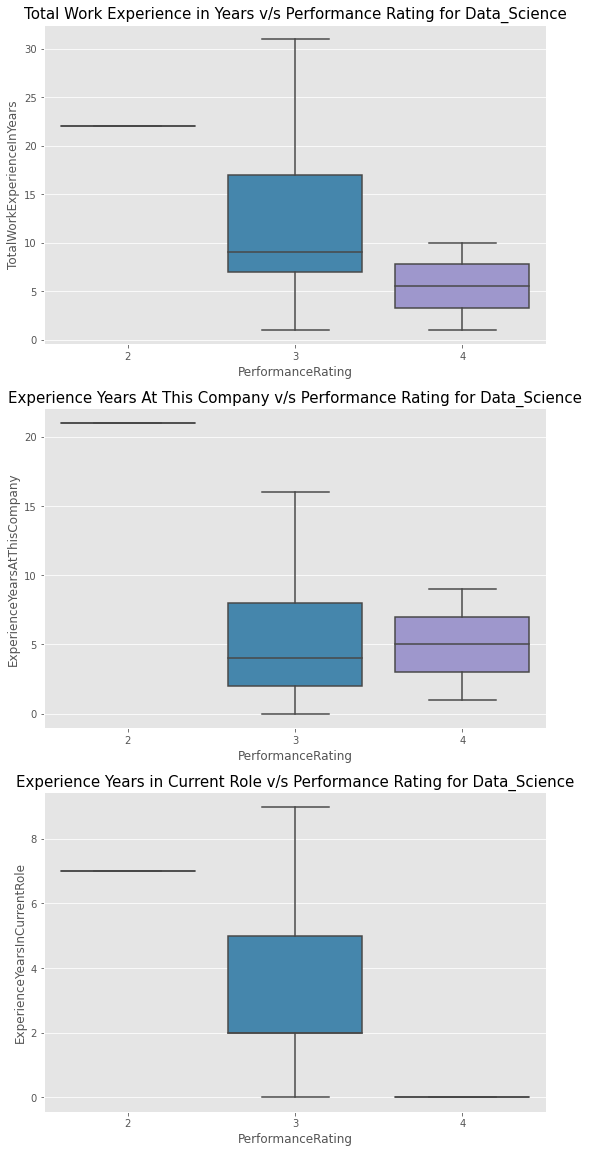

In [36]:
plt.figure(figsize=(9,20))
plt.subplot(311)
sns.boxplot(Data_Science['PerformanceRating'], Data_Science['TotalWorkExperienceInYears'])
plt.title("Total Work Experience in Years v/s Performance Rating for Data_Science", fontsize = 15)

plt.subplot(312)
sns.boxplot(Data_Science['PerformanceRating'], Data_Science['ExperienceYearsAtThisCompany'])
plt.title("Experience Years At This Company v/s Performance Rating for Data_Science", fontsize = 15)

plt.subplot(313)
sns.boxplot(Data_Science['PerformanceRating'], Data_Science['ExperienceYearsInCurrentRole'])
plt.title("Experience Years in Current Role v/s Performance Rating for Data_Science", fontsize = 15)

plt.show()

##### Research & Development Department

In [37]:
RD = original_data[original_data.EmpDepartment == 'Research & Development'] # Slicing the all coloums of Sales Row 
RD.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
156,E1001284,38,Male,Medical,Married,Research & Development,Senior Manager R&D,Travel_Frequently,10,1,...,2,3,0,2,2,1,0,2,No,3
157,E1001288,35,Male,Other,Divorced,Research & Development,Laboratory Technician,Travel_Rarely,14,4,...,4,5,2,1,4,2,0,2,Yes,3
158,E1001289,31,Female,Life Sciences,Married,Research & Development,Manufacturing Director,Travel_Frequently,1,1,...,3,4,1,3,4,3,0,3,No,3
159,E1001290,18,Male,Life Sciences,Single,Research & Development,Research Scientist,Non-Travel,5,2,...,4,0,2,3,0,0,0,0,No,3
160,E1001291,54,Female,Technical Degree,Married,Research & Development,Senior Manager R&D,Travel_Rarely,17,3,...,3,22,2,3,10,7,0,8,No,3


- Performance Rating with respect to number of employees

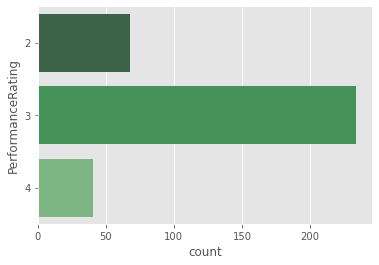

In [38]:
sns.countplot(y="PerformanceRating", data=RD, palette="Greens_d");

- Performance Rating with respect to Age Group

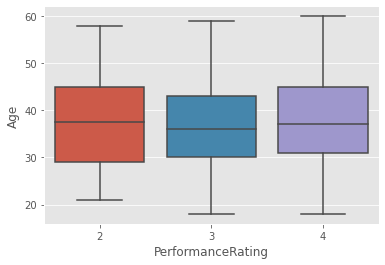

In [39]:
sns.boxplot(RD['PerformanceRating'], RD['Age'])

- Performance based on Gender

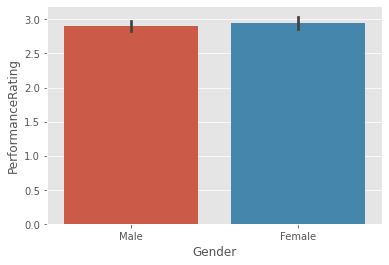

In [40]:
sns.barplot(RD['Gender'], RD['PerformanceRating'])

- Performance According to the Experience Level

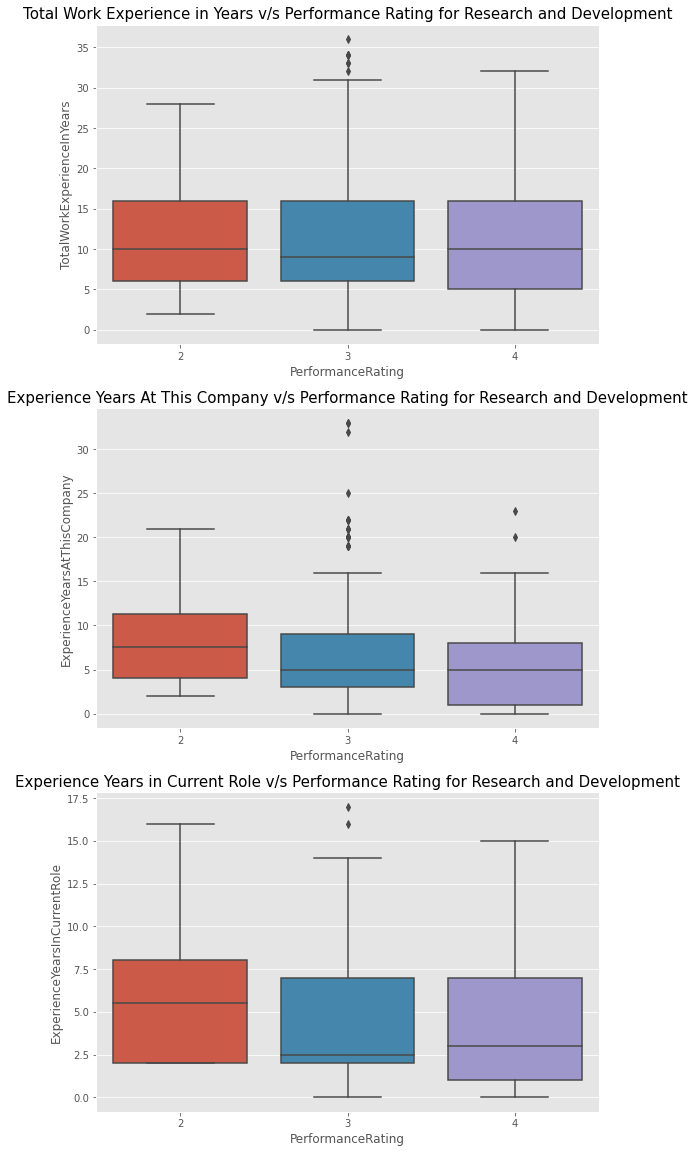

In [41]:
plt.figure(figsize=(9,20))
plt.subplot(311)
sns.boxplot(RD['PerformanceRating'], RD['TotalWorkExperienceInYears'])
plt.title("Total Work Experience in Years v/s Performance Rating for Research and Development", fontsize = 15)

plt.subplot(312)
sns.boxplot(RD['PerformanceRating'], RD['ExperienceYearsAtThisCompany'])
plt.title("Experience Years At This Company v/s Performance Rating for Research and Development", fontsize = 15)

plt.subplot(313)
sns.boxplot(RD['PerformanceRating'], RD['ExperienceYearsInCurrentRole'])
plt.title("Experience Years in Current Role v/s Performance Rating for Research and Development", fontsize = 15)

plt.show()

##### Finance Department

In [42]:
Finance = original_data[original_data.EmpDepartment == 'Finance'] # Slicing the all coloums of Sales Row 
Finance.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
482,E1001868,29,Male,Life Sciences,Divorced,Finance,Finance Manager,Travel_Frequently,2,1,...,4,6,0,4,6,4,1,3,No,2
484,E1001870,23,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Rarely,10,3,...,4,4,2,3,2,2,2,2,No,3
485,E1001874,35,Male,Life Sciences,Married,Finance,Finance Manager,Travel_Rarely,28,3,...,4,10,3,2,10,9,6,8,No,2
486,E1001875,34,Male,Technical Degree,Married,Finance,Finance Manager,Travel_Frequently,10,4,...,2,8,3,2,8,2,7,7,No,3
487,E1001877,43,Male,Technical Degree,Divorced,Finance,Finance Manager,Travel_Rarely,27,3,...,3,8,0,3,6,4,0,2,No,3


- Performance Rating with respect to number of employees

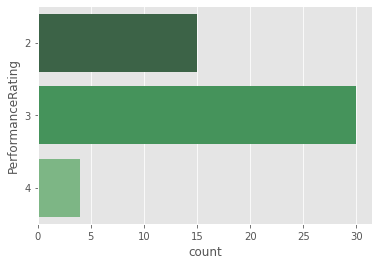

In [43]:
sns.countplot(y="PerformanceRating", data=Finance, palette="Greens_d");

- Performance Rating with respect to Age Group

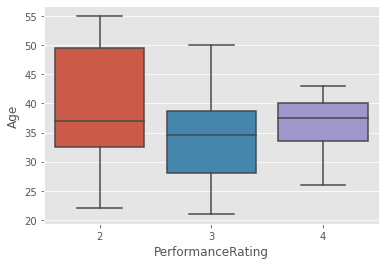

In [44]:
sns.boxplot(Finance['PerformanceRating'], Finance['Age'])

- Performance based on Gender

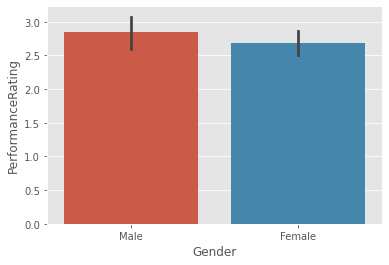

In [45]:
sns.barplot(Finance['Gender'], Finance['PerformanceRating'])

- Performance According to the Experience Level

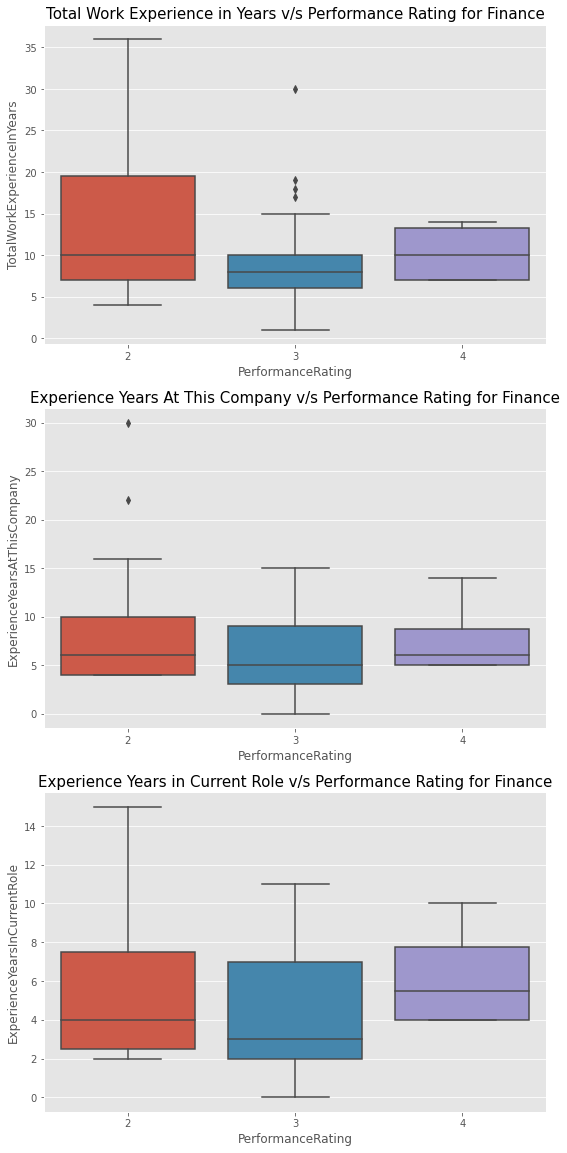

In [46]:
plt.figure(figsize=(9,20))
plt.subplot(311)
sns.boxplot(Finance['PerformanceRating'], Finance['TotalWorkExperienceInYears'])
plt.title("Total Work Experience in Years v/s Performance Rating for Finance", fontsize = 15)

plt.subplot(312)
sns.boxplot(Finance['PerformanceRating'], Finance['ExperienceYearsAtThisCompany'])
plt.title("Experience Years At This Company v/s Performance Rating for Finance", fontsize = 15)

plt.subplot(313)
sns.boxplot(Finance['PerformanceRating'], Finance['ExperienceYearsInCurrentRole'])
plt.title("Experience Years in Current Role v/s Performance Rating for Finance", fontsize = 15)

plt.show()

###  Data Preprocessing

- Converting Categorical Data into Numerical using OneHotEncoder

In [47]:
# Empty list to store columns with categorical data
categorical = []
for col, value in original_data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = original_data.columns.difference(categorical)

In [48]:
# Store the categorical data in a dataframe called attrition_cat
original_cat = original_data[categorical]
original_cat = original_cat.drop(['EmpNumber'], axis=1)

In [49]:
original_cat = pd.get_dummies(original_cat)
original_cat.head()

,Gender_Female,Gender_Male,EducationBackground_Human Resources,EducationBackground_Life Sciences,EducationBackground_Marketing,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
3,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [50]:
# All columns with dummy features
original_cat.keys()

Index(['Gender_Female', 'Gender_Male', 'EducationBackground_Human Resources',
       'EducationBackground_Life Sciences', 'EducationBackground_Marketing',
       'EducationBackground_Medical', 'EducationBackground_Other',
       'EducationBackground_Technical Degree', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'EmpDepartment_Data Science', 'EmpDepartment_Development',
       'EmpDepartment_Finance', 'EmpDepartment_Human Resources',
       'EmpDepartment_Research & Development', 'EmpDepartment_Sales',
       'EmpJobRole_Business Analyst', 'EmpJobRole_Data Scientist',
       'EmpJobRole_Delivery Manager', 'EmpJobRole_Developer',
       'EmpJobRole_Finance Manager', 'EmpJobRole_Healthcare Representative',
       'EmpJobRole_Human Resources', 'EmpJobRole_Laboratory Technician',
       'EmpJobRole_Manager', 'EmpJobRole_Manager R&D',
       'EmpJobRole_Manufacturing Director', 'EmpJobRole_Research Director',
       'EmpJobRole_Research Scientist'

In [51]:
# one hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

In [52]:
onehot = OneHotEncoder(sparse=False, drop='if_binary')

In [53]:
# Transform all dummy features
one_hot_arr = onehot.fit_transform(original_cat[['Gender_Female', 'Gender_Male', 'EducationBackground_Human Resources',
       'EducationBackground_Life Sciences', 'EducationBackground_Marketing',
       'EducationBackground_Medical', 'EducationBackground_Other',
       'EducationBackground_Technical Degree', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'EmpDepartment_Data Science', 'EmpDepartment_Development',
       'EmpDepartment_Finance', 'EmpDepartment_Human Resources',
       'EmpDepartment_Research & Development', 'EmpDepartment_Sales',
       'EmpJobRole_Business Analyst', 'EmpJobRole_Data Scientist',
       'EmpJobRole_Delivery Manager', 'EmpJobRole_Developer',
       'EmpJobRole_Finance Manager', 'EmpJobRole_Healthcare Representative',
       'EmpJobRole_Human Resources', 'EmpJobRole_Laboratory Technician',
       'EmpJobRole_Manager', 'EmpJobRole_Manager R&D',
       'EmpJobRole_Manufacturing Director', 'EmpJobRole_Research Director',
       'EmpJobRole_Research Scientist', 'EmpJobRole_Sales Executive',
       'EmpJobRole_Sales Representative', 'EmpJobRole_Senior Developer',
       'EmpJobRole_Senior Manager R&D', 'EmpJobRole_Technical Architect',
       'EmpJobRole_Technical Lead', 'BusinessTravelFrequency_Non-Travel',
       'BusinessTravelFrequency_Travel_Frequently',
       'BusinessTravelFrequency_Travel_Rarely', 'OverTime_No', 'OverTime_Yes',
       'Attrition_No', 'Attrition_Yes']])
one_hot_arr

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [54]:
# Succesfully encoded categorical features
one_hot_df = pd.DataFrame(one_hot_arr, columns=['Gender_Female', 'Gender_Male', 'EducationBackground_Human Resources',
       'EducationBackground_Life Sciences', 'EducationBackground_Marketing',
       'EducationBackground_Medical', 'EducationBackground_Other',
       'EducationBackground_Technical Degree', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'EmpDepartment_Data Science', 'EmpDepartment_Development',
       'EmpDepartment_Finance', 'EmpDepartment_Human Resources',
       'EmpDepartment_Research & Development', 'EmpDepartment_Sales',
       'EmpJobRole_Business Analyst', 'EmpJobRole_Data Scientist',
       'EmpJobRole_Delivery Manager', 'EmpJobRole_Developer',
       'EmpJobRole_Finance Manager', 'EmpJobRole_Healthcare Representative',
       'EmpJobRole_Human Resources', 'EmpJobRole_Laboratory Technician',
       'EmpJobRole_Manager', 'EmpJobRole_Manager R&D',
       'EmpJobRole_Manufacturing Director', 'EmpJobRole_Research Director',
       'EmpJobRole_Research Scientist', 'EmpJobRole_Sales Executive',
       'EmpJobRole_Sales Representative', 'EmpJobRole_Senior Developer',
       'EmpJobRole_Senior Manager R&D', 'EmpJobRole_Technical Architect',
       'EmpJobRole_Technical Lead', 'BusinessTravelFrequency_Non-Travel',
       'BusinessTravelFrequency_Travel_Frequently',
       'BusinessTravelFrequency_Travel_Rarely', 'OverTime_No', 'OverTime_Yes',
       'Attrition_No', 'Attrition_Yes'])
one_hot_df

,Gender_Female,Gender_Male,EducationBackground_Human Resources,EducationBackground_Life Sciences,EducationBackground_Marketing,EducationBackground_Medical,EducationBackground_Other,EducationBackground_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,...,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1196,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1197,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1198,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


##### Outliers Dectection for numerical feature

In [55]:
# Findind Numeric features
original_num = original_data[numerical]
original_num = original_num.drop(['PerformanceRating'], axis=1) # To remove the target column PerformanceRating
original_num

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,NumCompaniesWorked,TotalWorkExperienceInYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager
0,32,10,3,4,55,3,2,4,12,4,2,10,7,1,10,2,0,8
1,47,14,4,4,42,3,2,1,12,4,3,7,7,2,20,2,1,7
2,40,5,4,4,48,2,3,1,21,3,3,18,13,5,20,2,1,12
3,41,10,4,2,73,2,5,4,15,2,2,21,6,3,23,2,12,6
4,60,16,4,1,84,3,2,1,14,4,3,2,2,8,10,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,20,2,3,6,5,1,6,3,0,4
1196,37,10,2,4,80,4,1,4,17,1,3,1,0,3,4,2,0,0
1197,50,28,1,4,74,4,1,3,11,3,3,20,8,1,20,3,3,8
1198,34,9,3,4,46,2,3,2,14,2,4,8,7,1,9,3,7,7


- Check For Outliers

In [56]:
# Calculating Z_score
from scipy import stats
original_num
z_score=np.abs(stats.zscore(original_num))
z_score

array([[0.54145787, 0.10206085, 0.10300049, ..., 0.62223543, 0.68137224,
        1.10025139],
       [1.10988772, 0.59146353, 1.06114456, ..., 0.62223543, 0.37083419,
        0.8177735 ],
       [0.33925978, 0.5096925 , 1.06114456, ..., 0.62223543, 0.37083419,
        2.23016296],
       ...,
       [1.44015684, 2.30437292, 1.81328765, ..., 0.1695806 , 0.25024191,
        1.10025139],
       [0.32127846, 0.02028982, 0.10300049, ..., 0.1695806 , 1.49239412,
        0.8177735 ],
       [1.42217552, 0.75439384, 0.85514358, ..., 0.1695806 , 0.06029614,
        1.15957175]])

In [57]:
# Set threshold
threshold=3

In [58]:
# Detecting Outliers
out= np.where(z_score > threshold)
out

(array([   3,   25,   25,   52,   72,   77,  100,  100,  126,  137,  151,
         175,  178,  216,  252,  272,  272,  283,  283,  295,  308,  308,
         312,  316,  320,  320,  330,  342,  347,  361,  361,  387,  450,
         450,  456,  471,  475,  475,  490,  490,  528,  555,  571,  613,
         615,  615,  617,  639,  642,  655,  658,  703,  716,  730,  785,
         816,  816,  817,  818,  845,  845,  864,  864,  864,  867,  867,
         867,  888,  911,  921,  921,  946,  956,  956,  962,  962,  989,
         989,  999, 1036, 1083, 1083, 1104, 1117, 1117, 1135, 1152, 1156,
        1160], dtype=int64),
 array([16, 11, 17, 11, 17, 14, 11, 16, 17, 16, 12, 12, 11, 16, 16, 11, 16,
        16, 17, 14, 11, 16, 11, 16, 16, 17, 16, 14, 11, 12, 16, 16, 11, 16,
        16, 11, 11, 14, 11, 16, 14, 16, 16, 16, 14, 16, 16, 12, 16, 17, 12,
        14, 16, 12, 17, 11, 16, 12, 16, 11, 14, 12, 16, 17, 11, 14, 16, 17,
        16, 11, 12, 16, 12, 17, 11, 16, 11, 14, 12, 16, 16, 17, 11, 11, 16,

In [59]:
# Create dataframe for Outliers 
outlier = pd.DataFrame(out).T
outlier.columns = ['Row','Column']

In [60]:
outlier

,Row,Column
0,3,16
1,25,11
2,25,17
3,52,11
4,72,17
...,...,...
84,1117,16
85,1135,14
86,1152,12
87,1156,11


In [61]:
outlier["Column"].value_counts()

16    33
11    22
12    12
17    11
14    11
Name: Column, dtype: int64

In [62]:
original_num.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'NumCompaniesWorked', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- Total 89 Outliers are dectected
- Only 5 Column contains Outliers
   - 11 = 'ExperienceYearsAtThisCompany'
   - 12 = 'ExperienceYearsInCurrentRole'
   - 14 = 'TotalWorkExperienceInYears'
   - 16 = 'YearsSinceLastPromotion'
   - 17 = 'YearsWithCurrManager'

##### Outliers visualization and treating

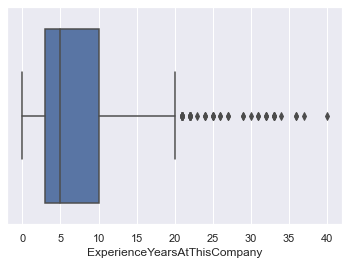

In [63]:
# plotting boxplot for all outliers
sns.set(style="darkgrid")
sns.boxplot(x=original_num['ExperienceYearsAtThisCompany'])

In [64]:
Q1,Q3 = np.percentile(original_num['ExperienceYearsAtThisCompany'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
exp_yr_th = original_num['ExperienceYearsAtThisCompany'].mean()
print("Mean Value of ExperienceYearsAtThisCompany Feature = ",exp_yr_th)

Q1 =  3.0
Q3 =  10.0
IQR =  7.0
Lower Bound =  -7.5
Upper Bound =  20.5
Mean Value of ExperienceYearsAtThisCompany Feature =  7.0775


In [65]:
# Replacing Outliers in mean value
original_num['ExperienceYearsAtThisCompany'] = np.where(original_num['ExperienceYearsAtThisCompany'] < -7.5, 7.07,original_num['ExperienceYearsAtThisCompany'])
original_num['ExperienceYearsAtThisCompany'] = np.where(original_num['ExperienceYearsAtThisCompany'] > 20.5, 7.07,original_num['ExperienceYearsAtThisCompany'])

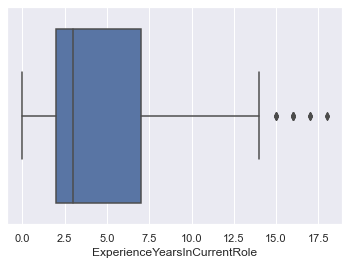

In [66]:
# plotting boxplot for all outliers
sns.set(style="darkgrid")
sns.boxplot(x=original_num['ExperienceYearsInCurrentRole'])

In [67]:
Q1,Q3 = np.percentile(original_num['ExperienceYearsInCurrentRole'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
exp_yr_ro = original_num['ExperienceYearsInCurrentRole'].mean()
print("Mean Value of ExperienceYearsInCurrentRole Feature = ",exp_yr_ro)

Q1 =  2.0
Q3 =  7.0
IQR =  5.0
Lower Bound =  -5.5
Upper Bound =  14.5
Mean Value of ExperienceYearsInCurrentRole Feature =  4.291666666666667


In [68]:
# Replacing Outliers in mean value
original_num['ExperienceYearsInCurrentRole'] = np.where(original_num['ExperienceYearsInCurrentRole'] < -5.5, 4.29,original_num['ExperienceYearsInCurrentRole'])
original_num['ExperienceYearsInCurrentRole'] = np.where(original_num['ExperienceYearsInCurrentRole'] > 14.5, 4.29,original_num['ExperienceYearsInCurrentRole'])

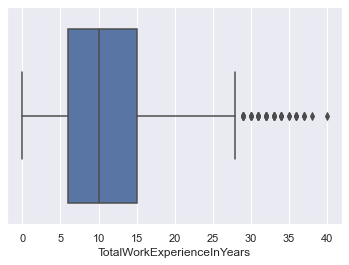

In [69]:
# plotting boxplot for all outliers
sns.set(style="darkgrid")
sns.boxplot(x=original_num['TotalWorkExperienceInYears'])

In [70]:
Q1,Q3 = np.percentile(original_num['TotalWorkExperienceInYears'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
to = original_num['TotalWorkExperienceInYears'].mean()
print("Mean Value of 'TotalWorkExperienceInYears' Feature = ",to)

Q1 =  6.0
Q3 =  15.0
IQR =  9.0
Lower Bound =  -7.5
Upper Bound =  28.5
Mean Value of 'TotalWorkExperienceInYears' Feature =  11.33


In [71]:
# Replacing Outliers in mean value
original_num['TotalWorkExperienceInYears'] = np.where(original_num['TotalWorkExperienceInYears'] < -7.5, 11.33,original_num['TotalWorkExperienceInYears'])
original_num['TotalWorkExperienceInYears'] = np.where(original_num['TotalWorkExperienceInYears'] > 28.5, 11.33,original_num['TotalWorkExperienceInYears'])

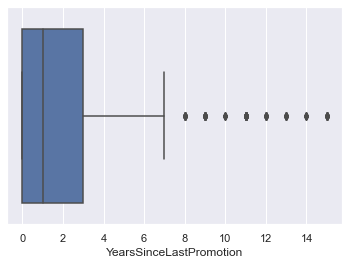

In [72]:
# plotting boxplot for all outliers
sns.set(style="darkgrid")
sns.boxplot(x=original_num['YearsSinceLastPromotion'])

In [73]:
Q1,Q3 = np.percentile(original_num['YearsSinceLastPromotion'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
yr_La_pr = original_num['YearsSinceLastPromotion'].mean()
print("Mean Value of 'YearsSinceLastPromotion' Feature = ",yr_La_pr)

Q1 =  0.0
Q3 =  3.0
IQR =  3.0
Lower Bound =  -4.5
Upper Bound =  7.5
Mean Value of 'YearsSinceLastPromotion' Feature =  2.194166666666667


In [74]:
# Replacing Outliers in mean value
original_num['YearsSinceLastPromotion'] = np.where(original_num['YearsSinceLastPromotion'] < -4.5, 2.19,original_num['YearsSinceLastPromotion'])
original_num['YearsSinceLastPromotion'] = np.where(original_num['YearsSinceLastPromotion'] > 7.5, 2.19,original_num['YearsSinceLastPromotion'])

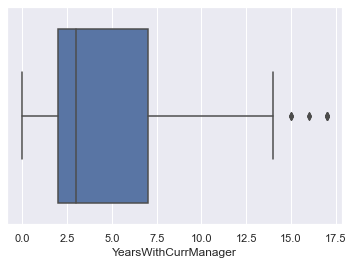

In [75]:
# plotting boxplot for all outliers
sns.set(style="darkgrid")
sns.boxplot(x=original_num['YearsWithCurrManager'])

In [76]:
Q1,Q3 = np.percentile(original_num['YearsWithCurrManager'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",up)
yr_Cu_ma = original_num['YearsWithCurrManager'].mean()
print("Mean Value of 'YearsWithCurrManager' Feature = ",yr_Cu_ma)

Q1 =  2.0
Q3 =  7.0
IQR =  5.0
Lower Bound =  -5.5
Upper Bound =  14.5
Mean Value of 'YearsWithCurrManager' Feature =  4.105


In [77]:
# Replacing Outliers in mean value
original_num['YearsWithCurrManager'] = np.where(original_num['YearsWithCurrManager'] < -5.5, 4.1,original_num['YearsWithCurrManager'])
original_num['YearsWithCurrManager'] = np.where(original_num['YearsWithCurrManager'] > 14.5, 4.1,original_num['YearsWithCurrManager'])

In [78]:
# Concat the two dataframes together columnwise
per = original_data["PerformanceRating"]
original_final = pd.concat([original_num, original_cat,per], axis=1)
original_final.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,...,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Non-Travel,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes,PerformanceRating
0,32,10,3,4,55,3,2,4,12,4,...,0,0,0,0,1,1,0,1,0,3
1,47,14,4,4,42,3,2,1,12,4,...,0,0,0,0,1,1,0,1,0,3
2,40,5,4,4,48,2,3,1,21,3,...,0,0,0,1,0,0,1,1,0,4
3,41,10,4,2,73,2,5,4,15,2,...,0,0,0,0,1,1,0,1,0,3
4,60,16,4,1,84,3,2,1,14,4,...,0,0,0,0,1,1,0,1,0,3


##### Feature Selection : 
There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance

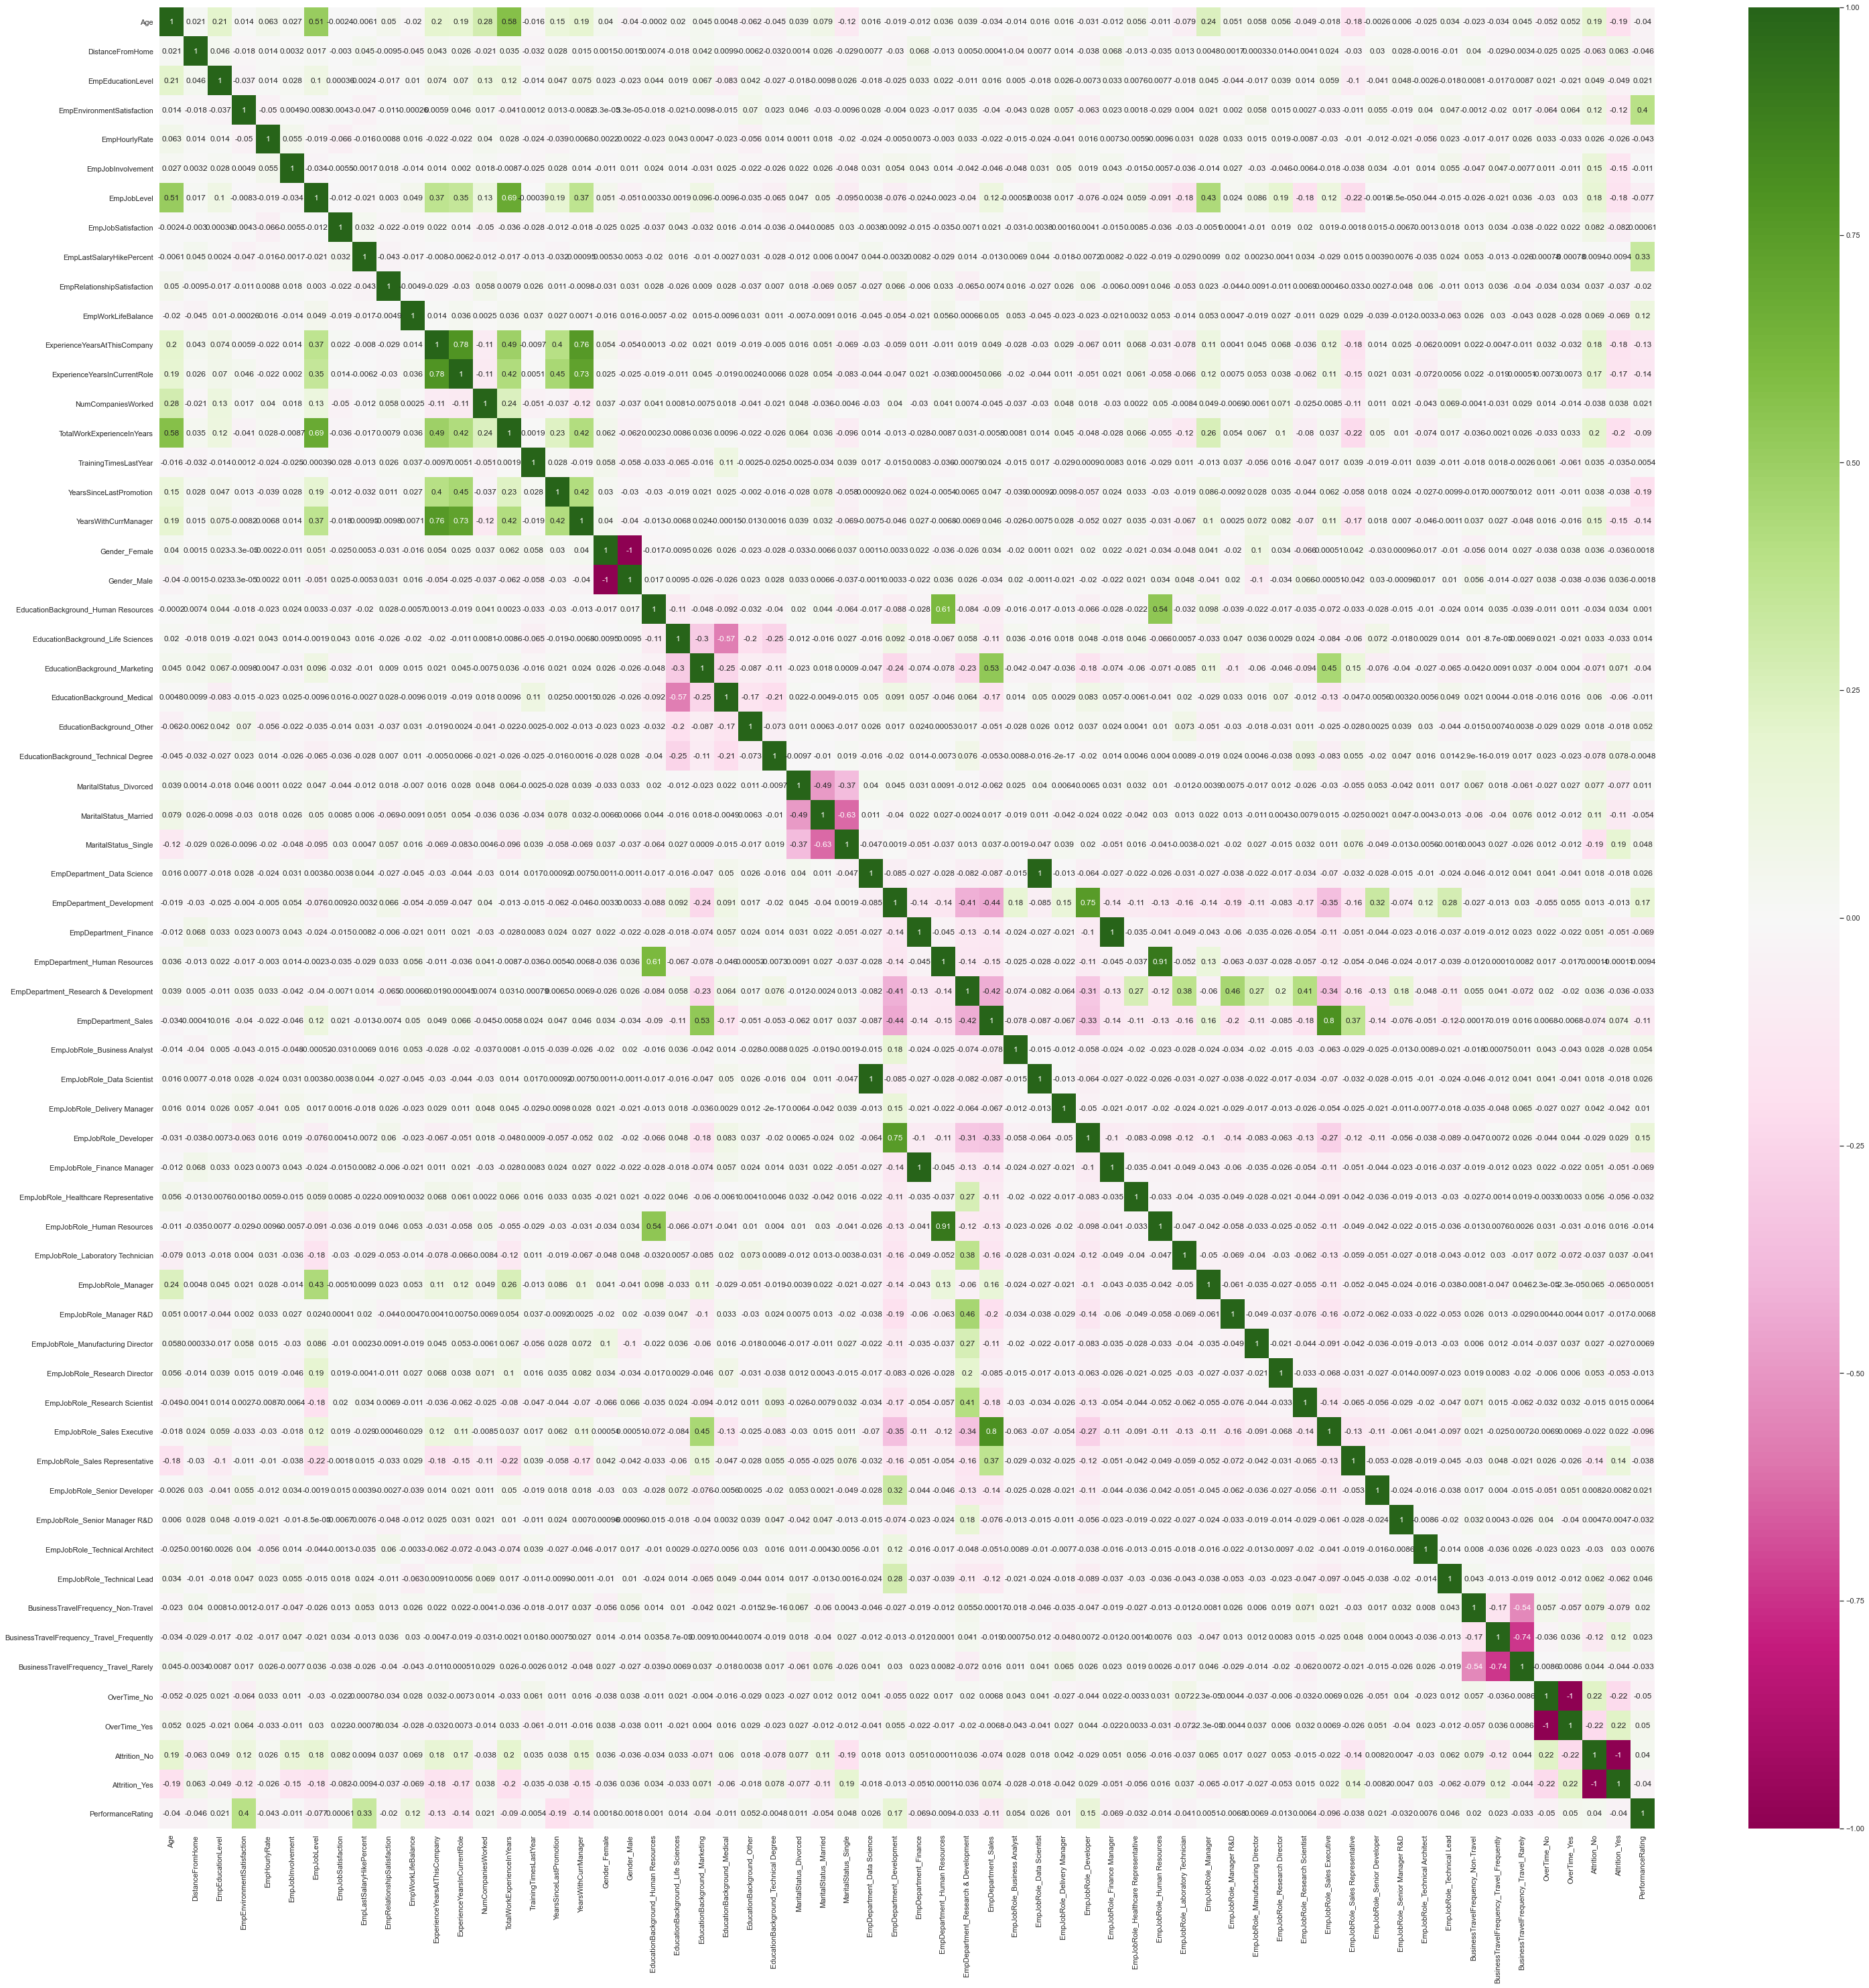

In [79]:
# Check Correlation Matrix Using Pearson Correlation
corr = original_final.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(original_final[top_corr_features].corr(),annot=True,cmap="PiYG")

##### Feature importance :
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.


In [80]:
X = original_final.iloc[:,:-1]  #independent columns
y = original_final["PerformanceRating"]    #dependent column 

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

[0.02589331 0.02588823 0.02362797 0.12396271 0.02675423 0.02066118
 0.01937879 0.02274187 0.12369151 0.02230247 0.02606136 0.02685045
 0.03157809 0.02303243 0.02435837 0.02286484 0.06430597 0.02894815
 0.01322522 0.0141963  0.00199198 0.01443397 0.00790626 0.01381969
 0.0047313  0.00722554 0.01180182 0.013946   0.01500281 0.001605
 0.01907494 0.00433708 0.00370551 0.00875143 0.00908504 0.00231174
 0.00180501 0.00061476 0.01367953 0.0043072  0.00351587 0.00234581
 0.00500705 0.00574902 0.0059388  0.00238007 0.00316328 0.00771929
 0.00764631 0.0037148  0.00439295 0.00216265 0.00023279 0.00244141
 0.00905262 0.01277625 0.01404429 0.00978096 0.00982567 0.00859865
 0.0090514 ]


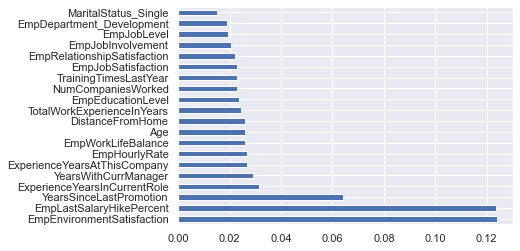

In [81]:
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### 2. Top 3 Important Factors effecting employee performance 

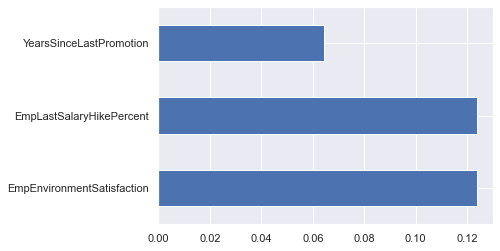

In [82]:
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

After Visualizing above plots
- 'Employee Environment Satisfaction','Employee Last Salary Hike Percent','Years Since Last Promotion' are 
Top 3 Important Factors which effecting employee performance

##### Removing Less Correlated Features
'Employee EnvironmentSatisfaction','Employee Last Salary Hike Percent','Years Since Last Promotion','Experience Year in Current Role','Years With Current Manager','Experience Years at This Comapany','Emp Work Life Balance','Emp Hourly Rate','Distance From Home','Age','EmpEducationLevel','EmpJobInvolvement','EmpJobLevel', 'EmpJobSatisfaction','EmpRelationshipSatisfaction','NumCompaniesWorked', 'TotalWorkExperienceInYears',
'MaritalStatus_Married','Gender_Male','TrainingTimesLastYear' are highly correlated and needed feature,We remove all the features expect these features

In [83]:
# remove less correlated features
original_final.drop(['Gender_Female','EducationBackground_Human Resources',
       'EducationBackground_Life Sciences', 'EducationBackground_Marketing','EducationBackground_Medical', 
       'EducationBackground_Other','EducationBackground_Technical Degree', 'MaritalStatus_Divorced',
       'MaritalStatus_Single','EmpDepartment_Data Science', 'EmpDepartment_Development',
       'EmpDepartment_Finance', 'EmpDepartment_Human Resources','EmpDepartment_Research & Development',
       'EmpDepartment_Sales','EmpJobRole_Business Analyst', 'EmpJobRole_Data Scientist',
       'EmpJobRole_Delivery Manager', 'EmpJobRole_Developer', 'EmpJobRole_Finance Manager', 
       'EmpJobRole_Healthcare Representative','EmpJobRole_Human Resources', 'EmpJobRole_Laboratory Technician',
       'EmpJobRole_Manager', 'EmpJobRole_Manager R&D',
       'EmpJobRole_Manufacturing Director', 'EmpJobRole_Research Director',
       'EmpJobRole_Research Scientist', 'EmpJobRole_Sales Executive',
       'EmpJobRole_Sales Representative', 'EmpJobRole_Senior Developer',
       'EmpJobRole_Senior Manager R&D', 'EmpJobRole_Technical Architect',
       'EmpJobRole_Technical Lead', 'BusinessTravelFrequency_Non-Travel',
       'BusinessTravelFrequency_Travel_Frequently',
       'BusinessTravelFrequency_Travel_Rarely', 'OverTime_No', 'OverTime_Yes',
       'Attrition_No', 'Attrition_Yes'],
         axis=1,inplace = True)

In [84]:
original_final

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,...,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,NumCompaniesWorked,TotalWorkExperienceInYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,MaritalStatus_Married,PerformanceRating
0,32,10,3,4,55,3,2,4,12,4,...,10.00,7.0,1,10.0,2,0.00,8.0,1,0,3
1,47,14,4,4,42,3,2,1,12,4,...,7.00,7.0,2,20.0,2,1.00,7.0,1,0,3
2,40,5,4,4,48,2,3,1,21,3,...,18.00,13.0,5,20.0,2,1.00,12.0,1,1,4
3,41,10,4,2,73,2,5,4,15,2,...,7.07,6.0,3,23.0,2,2.19,6.0,1,0,3
4,60,16,4,1,84,3,2,1,14,4,...,2.00,2.0,8,10.0,1,2.00,2.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,20,2,...,6.00,5.0,1,6.0,3,0.00,4.0,0,0,4
1196,37,10,2,4,80,4,1,4,17,1,...,1.00,0.0,3,4.0,2,0.00,0.0,1,0,3
1197,50,28,1,4,74,4,1,3,11,3,...,20.00,8.0,1,20.0,3,3.00,8.0,1,1,3
1198,34,9,3,4,46,2,3,2,14,2,...,8.00,7.0,1,9.0,3,7.00,7.0,0,0,3


### Feature Scaling

In [85]:
original_final.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'NumCompaniesWorked', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Male', 'MaritalStatus_Married',
       'PerformanceRating'],
      dtype='object')

In [86]:
# Check Distribution : Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(original_final)
scaled_features = scaler.transform(original_final)
#Convert to table format - MinMaxScaler
MinMax = pd.DataFrame(data=scaled_features, 
                            columns=['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'NumCompaniesWorked', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Male', 'MaritalStatus_Married',
       'PerformanceRating'])
MinMax

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,...,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,NumCompaniesWorked,TotalWorkExperienceInYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,MaritalStatus_Married,PerformanceRating
0,0.333333,0.321429,0.50,1.000000,0.357143,0.666667,0.25,1.000000,0.071429,1.000000,...,0.5000,0.500000,0.111111,0.357143,0.333333,0.000000,0.571429,1.0,0.0,0.5
1,0.690476,0.464286,0.75,1.000000,0.171429,0.666667,0.25,0.000000,0.071429,1.000000,...,0.3500,0.500000,0.222222,0.714286,0.333333,0.142857,0.500000,1.0,0.0,0.5
2,0.523810,0.142857,0.75,1.000000,0.257143,0.333333,0.50,0.000000,0.714286,0.666667,...,0.9000,0.928571,0.555556,0.714286,0.333333,0.142857,0.857143,1.0,1.0,1.0
3,0.547619,0.321429,0.75,0.333333,0.614286,0.333333,1.00,1.000000,0.285714,0.333333,...,0.3535,0.428571,0.333333,0.821429,0.333333,0.312857,0.428571,1.0,0.0,0.5
4,1.000000,0.535714,0.75,0.000000,0.771429,0.666667,0.25,0.000000,0.214286,1.000000,...,0.1000,0.142857,0.888889,0.357143,0.166667,0.285714,0.142857,1.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.214286,0.071429,0.00,1.000000,0.585714,1.000000,0.25,1.000000,0.642857,0.333333,...,0.3000,0.357143,0.111111,0.214286,0.500000,0.000000,0.285714,0.0,0.0,1.0
1196,0.452381,0.321429,0.25,1.000000,0.714286,1.000000,0.00,1.000000,0.428571,0.000000,...,0.0500,0.000000,0.333333,0.142857,0.333333,0.000000,0.000000,1.0,0.0,0.5
1197,0.761905,0.964286,0.00,1.000000,0.628571,1.000000,0.00,0.666667,0.000000,0.666667,...,1.0000,0.571429,0.111111,0.714286,0.500000,0.428571,0.571429,1.0,1.0,0.5
1198,0.380952,0.285714,0.50,1.000000,0.228571,0.333333,0.50,0.333333,0.214286,0.333333,...,0.4000,0.500000,0.111111,0.321429,0.500000,1.000000,0.500000,0.0,0.0,0.5


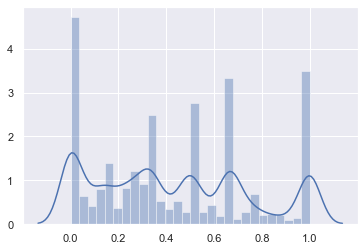

In [87]:
# seaborn plot for dataset
sns.distplot(MinMax)

In [88]:
#skewness for dataset
skewness = stats.skew(MinMax)
skewness

array([ 0.38366461,  0.961752  , -0.25066013, -0.3072801 , -0.03512092,
       -0.55714852,  1.02277263, -0.32387071,  0.80764247, -0.31816466,
       -0.53855679,  1.02462816,  0.65298189,  1.04732351,  0.77230255,
        0.53140788,  1.52132135,  0.61747583, -0.42601432,  0.17398799,
       -0.07048818])

In [89]:
#kurtosis for dataset
kurtosis = stats.kurtosis(MinMax)
kurtosis

array([-0.43420168, -0.24600539, -0.63794463, -1.20555592, -1.18694674,
        0.36213956,  0.37973428, -1.22305202, -0.30348915, -1.1619885 ,
        0.38996068,  0.91479371, -0.41115567,  0.06358056,  0.08757755,
        0.56017324,  1.57500602, -0.620249  , -1.8185118 , -1.96972818,
        0.66667383])

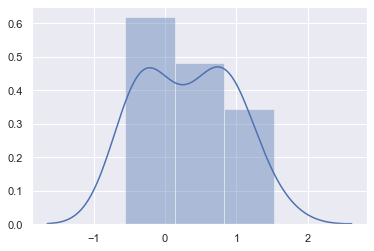

In [90]:
# seaborn plot for skewness for dataset 
sns.distplot(skewness)

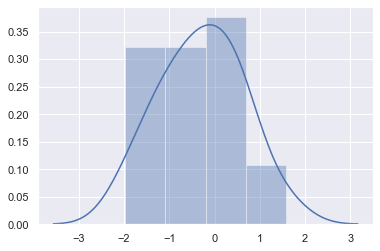

In [91]:
# seaborn plot for skewness for dataset 
sns.distplot(kurtosis)

In [92]:
# Formating the Dataset : Standardization 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(original_final)
#Convert to table format - StandardScaler 
Data = pd.DataFrame(data=sc_X,  
                    columns=['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'NumCompaniesWorked', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Male', 'MaritalStatus_Married',
       'PerformanceRating'])
Data


,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,...,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,NumCompaniesWorked,TotalWorkExperienceInYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,MaritalStatus_Married,PerformanceRating
0,-0.541458,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.889111,1.185833,...,0.847229,0.859582,-0.674538,-0.067392,-0.622235,-0.800169,1.199561,0.809427,-0.916783,0.099618
1,1.109888,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.889111,1.185833,...,0.178962,0.859582,-0.269410,1.503434,-0.622235,-0.279373,0.900163,0.809427,-0.916783,0.099618
2,0.339260,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,1.594054,0.255768,...,2.629275,2.658518,0.945974,1.503434,-0.622235,-0.279373,2.397150,0.809427,1.090771,2.027702
3,0.449349,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,-0.061389,-0.674297,...,0.194555,0.559759,0.135718,1.974681,-0.622235,0.340375,0.600766,0.809427,-0.916783,0.099618
4,2.541054,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,-0.337297,1.185833,...,-0.934817,-0.639532,2.161359,-0.067392,-1.414051,0.241424,-0.596824,0.809427,-0.916783,0.099618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.091906,-0.754394,-1.813288,1.177978,0.248397,1.794297,-0.060955,1.151824,1.318147,-0.674297,...,-0.043794,0.259936,-0.674538,-0.695723,0.169581,-0.800169,0.001971,-1.235442,-0.916783,2.027702
1196,0.008991,0.102061,-0.855144,1.177978,0.693878,1.794297,-0.963992,1.151824,0.490425,-1.604362,...,-1.157573,-1.239177,0.135718,-1.009888,-0.622235,-0.800169,-1.195619,0.809427,-0.916783,0.099618
1197,1.440157,2.304373,-1.813288,1.177978,0.396891,1.794297,-0.963992,0.243087,-1.165018,0.255768,...,3.074787,1.159404,-0.674538,1.503434,0.169581,0.762221,1.199561,0.809427,1.090771,0.099618
1198,-0.321278,-0.020290,0.103000,1.177978,-0.989050,-1.035081,0.842082,-0.665650,-0.337297,-0.674297,...,0.401718,0.859582,-0.674538,-0.224475,0.169581,2.845407,0.900163,-1.235442,-0.916783,0.099618


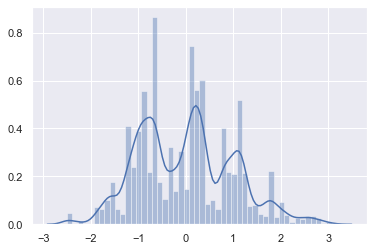

In [93]:
# seaborn plot for dataset
sns.distplot(Data)

- Now, Dataset is evenly Distributed

### 3. Model Selection and Building

In the section below, we used algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network to calculate the accuracy

##### Defining X and y

In [94]:
X = Data.iloc[:,:-1]
y = original_final.PerformanceRating

In [95]:
X

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,NumCompaniesWorked,TotalWorkExperienceInYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,MaritalStatus_Married
0,-0.541458,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.889111,1.185833,-1.064491,0.847229,0.859582,-0.674538,-0.067392,-0.622235,-0.800169,1.199561,0.809427,-0.916783
1,1.109888,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.889111,1.185833,0.365956,0.178962,0.859582,-0.269410,1.503434,-0.622235,-0.279373,0.900163,0.809427,-0.916783
2,0.339260,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,1.594054,0.255768,0.365956,2.629275,2.658518,0.945974,1.503434,-0.622235,-0.279373,2.397150,0.809427,1.090771
3,0.449349,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,-0.061389,-0.674297,-1.064491,0.194555,0.559759,0.135718,1.974681,-0.622235,0.340375,0.600766,0.809427,-0.916783
4,2.541054,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,-0.337297,1.185833,0.365956,-0.934817,-0.639532,2.161359,-0.067392,-1.414051,0.241424,-0.596824,0.809427,-0.916783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-1.091906,-0.754394,-1.813288,1.177978,0.248397,1.794297,-0.060955,1.151824,1.318147,-0.674297,0.365956,-0.043794,0.259936,-0.674538,-0.695723,0.169581,-0.800169,0.001971,-1.235442,-0.916783
1196,0.008991,0.102061,-0.855144,1.177978,0.693878,1.794297,-0.963992,1.151824,0.490425,-1.604362,0.365956,-1.157573,-1.239177,0.135718,-1.009888,-0.622235,-0.800169,-1.195619,0.809427,-0.916783
1197,1.440157,2.304373,-1.813288,1.177978,0.396891,1.794297,-0.963992,0.243087,-1.165018,0.255768,0.365956,3.074787,1.159404,-0.674538,1.503434,0.169581,0.762221,1.199561,0.809427,1.090771
1198,-0.321278,-0.020290,0.103000,1.177978,-0.989050,-1.035081,0.842082,-0.665650,-0.337297,-0.674297,1.796403,0.401718,0.859582,-0.674538,-0.224475,0.169581,2.845407,0.900163,-1.235442,-0.916783


In [96]:
y

0       3
1       3
2       4
3       3
4       3
       ..
1195    4
1196    3
1197    3
1198    3
1199    2
Name: PerformanceRating, Length: 1200, dtype: int64

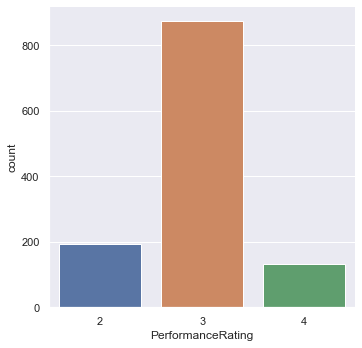

In [97]:
sns.catplot('PerformanceRating', data = original_final, kind = 'count')

- Dataset is imbalanced

##### SMOTE to oversample due to the skewness in target
Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.
##### Handle Imbalance Data

In [98]:
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({3: 874, 2: 194, 4: 132})


In [99]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_sample(X,y)

In [100]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({3: 874, 4: 874, 2: 874})


- Dataset is Balanced

##### Splitting the Data into Train and Test sets

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.3)

In [102]:
# shape of train test data
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (1835, 20)
X_test shape (787, 20)
y_train shape (1835,)
y_test shape (787,)


##### Applying ML Algorithms for selecting best model
##### 1. Logistic Regression

In [103]:
# For Multiclass classification
from sklearn.multiclass import OneVsRestClassifier
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = OneVsRestClassifier(LogisticRegression())
model_logr.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [104]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.8246505717916137
              precision    recall  f1-score   support

           2       0.81      0.88      0.84       255
           3       0.82      0.69      0.75       267
           4       0.84      0.91      0.87       265

    accuracy                           0.82       787
   macro avg       0.82      0.83      0.82       787
weighted avg       0.82      0.82      0.82       787



In [105]:
confusion_matrix(y_test,y_predict_log)

array([[225,  23,   7],
       [ 45, 183,  39],
       [  8,  16, 241]], dtype=int64)

##### 2. Support Vector Machine

In [106]:
# Training the model
from sklearn.svm import SVC
rbf_svc = OneVsRestClassifier(SVC(kernel='rbf', C=100, random_state=10))
rbf_svc.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=100, random_state=10))

In [107]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.9618805590851334
              precision    recall  f1-score   support

           2       0.94      0.99      0.96       255
           3       0.99      0.90      0.94       267
           4       0.96      1.00      0.98       265

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



In [108]:
confusion_matrix(y_test,y_predict_svm)

array([[253,   2,   0],
       [ 17, 239,  11],
       [  0,   0, 265]], dtype=int64)

##### 3. Decision Tree 

In [109]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dt=OneVsRestClassifier(DecisionTreeClassifier())
model_dt.fit(X_train,y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [110]:
# Predicting the model
y_predict_dt = model_dt.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dt))
print(classification_report(y_test,y_predict_dt))

0.9135959339263025
              precision    recall  f1-score   support

           2       0.95      0.88      0.91       255
           3       0.96      0.87      0.91       267
           4       0.85      1.00      0.92       265

    accuracy                           0.91       787
   macro avg       0.92      0.91      0.91       787
weighted avg       0.92      0.91      0.91       787



In [111]:
confusion_matrix(y_test,y_predict_dt)

array([[224,   9,  22],
       [ 13, 231,  23],
       [  0,   1, 264]], dtype=int64)

##### 4. Random Forest 

In [112]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf=OneVsRestClassifier(RandomForestClassifier(n_estimators = 1000, random_state = 42))
model_rf.fit(X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                     random_state=42))

In [113]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9644218551461246
              precision    recall  f1-score   support

           2       0.94      0.98      0.96       255
           3       0.97      0.93      0.95       267
           4       0.99      0.98      0.99       265

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



In [114]:
confusion_matrix(y_test,y_predict_rf)

array([[251,   4,   0],
       [ 17, 247,   3],
       [  0,   4, 261]], dtype=int64)

##### 5. Naive Bayes Bernoulli

In [115]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = OneVsRestClassifier(BernoulliNB())
model_nb.fit(X_train,y_train)

OneVsRestClassifier(estimator=BernoulliNB())

In [116]:
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

BernoulliNB()

In [117]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.7509529860228716
              precision    recall  f1-score   support

           2       0.79      0.81      0.80       255
           3       0.75      0.57      0.65       267
           4       0.72      0.88      0.79       265

    accuracy                           0.75       787
   macro avg       0.75      0.75      0.75       787
weighted avg       0.75      0.75      0.75       787



In [118]:
confusion_matrix(y_test,y_predict_nb)

array([[207,  38,  10],
       [ 36, 152,  79],
       [ 19,  14, 232]], dtype=int64)

##### 6. K-Nearest Neighbor

In [119]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=10,metric='euclidean')) # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=10))

In [120]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.795425667090216
              precision    recall  f1-score   support

           2       0.79      0.95      0.86       255
           3       0.94      0.46      0.62       267
           4       0.75      0.98      0.85       265

    accuracy                           0.80       787
   macro avg       0.82      0.80      0.78       787
weighted avg       0.83      0.80      0.78       787



In [121]:
confusion_matrix(y_test,y_predict_knn)

array([[243,   4,   8],
       [ 65, 123,  79],
       [  1,   4, 260]], dtype=int64)

##### 7. XGBoost Classifier

In [122]:
# Training the model
from xgboost import XGBClassifier
model_xgb = OneVsRestClassifier(XGBClassifier())
model_xgb.fit(X_train,y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
                                      

In [123]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.9593392630241423
              precision    recall  f1-score   support

           2       0.93      0.97      0.95       255
           3       0.96      0.92      0.94       267
           4       0.98      0.99      0.98       265

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



In [124]:
confusion_matrix(y_test,y_predict_xgb)

array([[248,   6,   1],
       [ 18, 245,   4],
       [  0,   3, 262]], dtype=int64)

- We found out that Random Forest Classifier algorithms are gives the maximum accuracy and better classification report as compaired to other algorithms.

##### Model Creating and Training 
##### Hyperparameter Tuning Using GridSerchCV

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
# Training the model
model=RandomForestClassifier(n_estimators = 1000, random_state =42)
parameters={'max_depth': [30,50],
            'min_samples_split':[2,5],
            'min_samples_leaf':[1,2],
            }
grid = GridSearchCV(model,parameters,scoring='accuracy',cv=2,verbose=True)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   49.3s finished


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             param_grid={'max_depth': [30, 50], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='accuracy', verbose=True)

In [127]:
grid.best_score_

0.9422420367638149

In [128]:
grid.best_params_

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [129]:
grid.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=1000, random_state=42)

- This is Best Parameter For Random Forest Classifier For Model Fitting

##### Model Fitting

In [130]:
model = OneVsRestClassifier(RandomForestClassifier(max_depth=30, n_estimators=1000,
                       random_state=42,min_samples_leaf = 1,min_samples_split = 2))
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=30,
                                                     n_estimators=1000,
                                                     random_state=42))

In [131]:
# Predicting the model
y_predict = model.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9644218551461246
              precision    recall  f1-score   support

           2       0.94      0.98      0.96       255
           3       0.97      0.93      0.95       267
           4       0.99      0.98      0.99       265

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



In [132]:
confusion_matrix(y_test,y_predict)

array([[251,   4,   0],
       [ 17, 247,   3],
       [  0,   4, 261]], dtype=int64)

### Model Evaluation

##### Accuracy Score

In [133]:
# acuracy score
accuracy_score(y_test,y_predict)

0.9644218551461246

##### Confusion Matrix

In [134]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({3: 267, 4: 265, 2: 255})


col_0,2,3,4
PerformanceRating,,,
2,251,4,0
3,17,247,3
4,0,4,261


In [135]:
confusion_matrix(y_test,y_predict)

array([[251,   4,   0],
       [ 17, 247,   3],
       [  0,   4, 261]], dtype=int64)

##### MSE and RMSE

In [136]:
# errrors
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

0.035578144853875476
0.18862169772821863


##### Precision

In [137]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Precision 
print('Precision: %.3f' % precision_score(y_test,y_predict, average = 'micro'))

Precision: 0.964


##### Recall

In [138]:
# Recall 
print('Recall: %.3f' % recall_score(y_test,y_predict, average = 'micro'))

Recall: 0.964


##### F1 Score

In [139]:
# F1_score 
print('F1_score: %.3f' % f1_score(y_test,y_predict, average = 'micro'))

F1_score: 0.964


##### Evaluating Precision, recall,F1 score matrix

In [140]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.94      0.98      0.96       255
           3       0.97      0.93      0.95       267
           4       0.99      0.98      0.99       265

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



##### Predicted Model

In [141]:
display(y_predict)

array([2, 2, 3, 3, 3, 3, 2, 4, 3, 4, 2, 4, 4, 2, 2, 4, 4, 4, 3, 3, 3, 2,
       2, 2, 3, 4, 2, 2, 3, 2, 4, 3, 4, 3, 2, 2, 3, 2, 4, 3, 4, 3, 2, 4,
       3, 2, 4, 2, 3, 3, 4, 4, 2, 3, 2, 4, 4, 4, 2, 2, 3, 2, 4, 2, 3, 2,
       3, 4, 2, 4, 4, 4, 4, 4, 3, 2, 3, 2, 4, 4, 2, 4, 3, 2, 3, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3, 2,
       2, 4, 3, 2, 2, 3, 3, 3, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 3, 3,
       2, 2, 3, 4, 3, 2, 3, 4, 4, 3, 2, 4, 2, 2, 4, 4, 4, 4, 3, 3, 2, 3,
       3, 4, 2, 2, 3, 4, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 2, 2, 3, 3, 4, 4, 4, 2, 4, 3, 2, 3, 4, 2, 3,
       3, 2, 3, 4, 4, 2, 3, 3, 4, 4, 4, 3, 4, 2, 3, 4, 3, 3, 4, 2, 3, 3,
       2, 3, 4, 4, 2, 4, 3, 2, 2, 2, 4, 2, 3, 4, 3, 3, 2, 4, 4, 2, 4, 4,
       2, 3, 4, 3, 4, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3, 4, 4, 4, 3, 4,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 3, 4, 3, 3, 2, 4, 3,
       2, 4, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 4, 4, 4,

In [142]:
y_test = pd.DataFrame(y_test, columns = ["PerformanceRating"])

In [143]:
y_test

,PerformanceRating
1452,2
1859,2
701,3
1122,3
724,3
...,...
2355,4
2539,4
557,3
772,2


##### Save and Load the Model

In [144]:
import joblib

In [145]:
#save model using dump()
joblib.dump(model,'IABAC')

['IABAC']

In [146]:
#load model using load()
model = joblib.load('IABAC')

In [147]:
#Predicting model
model.predict([[32, 10, 3, 4, 55, 3, 2, 4, 12, 4, 2, 10, 7 ,1, 10, 2, 0, 8, 1, 0]])

array([4], dtype=int64)